# Ensemble Learning and Random Forest

Ensemble learning is a machine learning technique that combines multiple individual models to improve the predictive power and robustness of the overall model. One popular type of ensemble learning is the random forest algorithm, which uses a collection of decision trees to make predictions. 

In this notebook, we apply this algorithm on the penguin dataset and analyze the performance.

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

# Import the tool form sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [15]:
# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("palmer_penguins.txt")

df.dropna(inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## Data Visualization

We choose "bill_length_mm" and "bill_depth_mm" as our variables. Then plot the scatter plot.

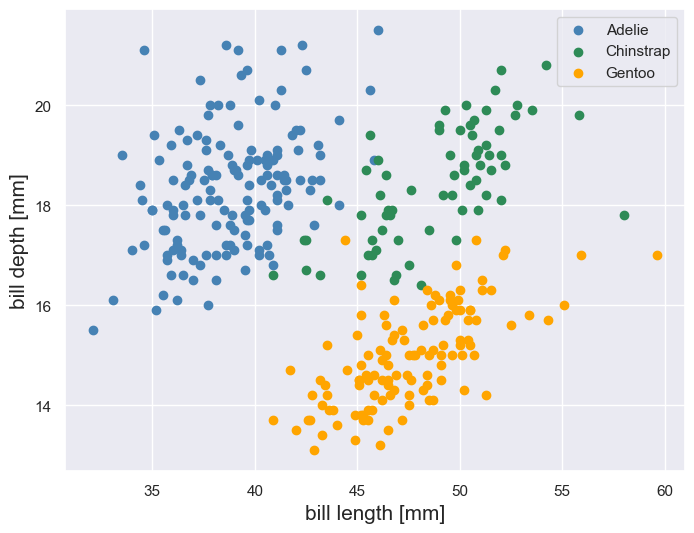

In [5]:
# Extract out desired features from Penguins Dataset, and covert features to numpy array
X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    
    elif y == "Chinstrap":
        return 1
    else:
        return 2
         
# # Extract out labels, and convert labels to numpy array
y = df["species"].map(make_labels).to_numpy()

# Plot the data
penguins = ["Adelie", "Chinstrap","Gentoo"]
colors = ["steelblue", "seagreen","orange"]

fig, ax = plt.subplots(figsize = (8, 6))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

## Random Forest

In this part, we split the dataset into train dataset and test dataset, then we apply the RandomForestClassifier on this dataset.

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2,
                                              random_state=42)

In [17]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9253731343283582

We combine logistic regression, MLP and random forest.

In [8]:
log_clf=LogisticRegression()
mlp_clf=MLPClassifier()
rand_clf=RandomForestClassifier()

voting_clf=VotingClassifier([('lr',log_clf),
                            ('mlp',mlp_clf),
                            ('rf',rand_clf)],voting="hard")

In [9]:
import warnings
warnings.filterwarnings('ignore')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

In [10]:
for clf in [log_clf,mlp_clf,rand_clf,voting_clf]:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f'{clf.__class__.__name__},accuracy score={accuracy_score(y_test,y_pred)}')

LogisticRegression,accuracy score=0.9552238805970149
MLPClassifier,accuracy score=0.8582089552238806
RandomForestClassifier,accuracy score=0.9328358208955224
VotingClassifier,accuracy score=0.9552238805970149


According to the accuracy above, we could see the VotingClassifier has the highest accuracy and MLPClassifier has the lowest accuracy.

## Bagging

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf=BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=500,
                         max_samples=100,
                         bootstrap=True,
                         n_jobs=-1)

In [12]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [13]:
y_pred=bag_clf.predict(X_test)

In [14]:
accuracy_score(y_test,y_pred)

0.9253731343283582

The bagging method achieved an accuracy score of 0.925, which is higher than the MLP classifier's score of 0.853. However, the difference in accuracy between these methods is relatively small, indicating that the MLP classifier has the lowest accuracy score among the other methods.